In [1]:
%load_ext autoreload
%autoreload 2
from src.data_interface import DataInterface
from src.analysis.base_tools import BaseTools
from src.analysis.ibex_coremark_tools import IbexCoremarkTools
from src.analysis.ibex_hwsec_coremark_tools import IbexHwsecCoremarkTools 
from src.run_info.run_info import RunInfo

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.special import comb
from anytree.exporter import DotExporter


In [2]:
def visualization_setup():
    # Interactive plots. Requires tkinter on the machine running the code
    mpl.use("TkAgg")
    # Latex formatting for plots. Some visualizations might not work without this
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["mathtext.fontset"] = "dejavuserif"


runinfo = RunInfo("src/run_info/ibex_hwsec_coremark.ini")
data_interface = DataInterface(runinfo)

golden = data_interface.golden_log
node = data_interface.get_node_by_name("register_file_i")[0]
root = data_interface.root
node_data = data_interface.get_seu_log_by_node(node)
root_data = data_interface.get_seu_log_by_node(root)

node_runs = list(node_data.index)

Parsing SEU logs...


  0%|          | 0/54862 [00:00<?, ?it/s]

  1%|          | 684/54862 [00:00<00:07, 6836.50it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_12-37-32.061222/log.txt
  'utf-8' codec can't decode byte 0x94 in position 250: invalid start byte


  6%|▋         | 3515/54862 [00:00<00:14, 3424.17it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_02-20-48.291602/log.txt
  'utf-8' codec can't decode byte 0xa8 in position 37: invalid start byte


 12%|█▏        | 6390/54862 [00:01<00:10, 4452.46it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-04_12-52-57.039519/log.txt
  'utf-8' codec can't decode byte 0x82 in position 354: invalid start byte


 21%|██        | 11248/54862 [00:02<00:08, 5221.22it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-03_13-34-24.320450/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 206: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-03_13-49-22.681317/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 204: invalid start byte


 27%|██▋       | 14706/54862 [00:03<00:08, 4556.41it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_12-54-43.668077/log.txt
  'utf-8' codec can't decode byte 0x83 in position 498: invalid start byte


 32%|███▏      | 17518/54862 [00:04<00:09, 3798.44it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-03_04-23-50.774970/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 745: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_18-04-41.717538/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 579: invalid start byte


 35%|███▍      | 19099/54862 [00:04<00:09, 3838.64it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_08-43-53.883889/log.txt
  'utf-8' codec can't decode byte 0x94 in position 248: invalid start byte


 38%|███▊      | 20909/54862 [00:05<00:08, 3806.81it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_16-23-53.976713/log.txt
  'utf-8' codec can't decode byte 0x93 in position 724: invalid start byte


 69%|██████▊   | 37615/54862 [00:10<00:06, 2516.20it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-05_14-13-14.227176/log.txt
  'utf-8' codec can't decode byte 0xfc in position 873: invalid start byte


 70%|███████   | 38637/54862 [00:10<00:04, 3541.82it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-03_01-45-27.013684/log.txt
  'utf-8' codec can't decode byte 0x94 in position 249: invalid start byte


 79%|███████▉  | 43300/54862 [00:12<00:02, 5075.32it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-03_14-39-03.566664/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 36: invalid start byte


 97%|█████████▋| 53281/54862 [00:14<00:00, 4421.39it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_hwsec_051223/seu_2023-12-02_17-54-45.241557/log.txt
  'utf-8' codec can't decode byte 0x94 in position 249: invalid start byte


100%|██████████| 54862/54862 [00:15<00:00, 3603.56it/s]


  Parsed 54228 logs, percent failed reads: 0.03%
Done parsing SEU logs
Building register tree
  55.54% of the register tree is unpopulated
Built register tree
Parsing SEU logs for optional data...


100%|██████████| 54228/54228 [00:05<00:00, 10005.86it/s]


Done parsing SEU logs for optional data


In [3]:
print(f"Number of entries on node_data: {len(node_data)}")
print(f"Number of entries on root_data: {len(root_data)}")

node_data.head()

Number of entries on node_data: 8939
Number of entries on root_data: 54228


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,uvm_seed,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-12-03_17-07-58.824908,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,3994363,34,8203f89000000028,8203f89400000028,1973113587[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-03_09-23-47.625955,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,363425,16,8203f84800000060,8202f84800000060,772374629[0m,0xe9f5,0xa020,0x1fd7,0x0000,0xa020
seu_2023-12-04_04-59-46.126219,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,4315610,8,4024000000000017,4024010000000017,1513947703[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-02_05-21-46.524953,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,3780363,7,ffffffff0000002a,ffffff7f0000002a,1130451474[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-02_13-23-21.272831,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,4107778,2,000000000000002a,000000040000002a,1971231575[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714


/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:214: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:266: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_coremark_tools.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


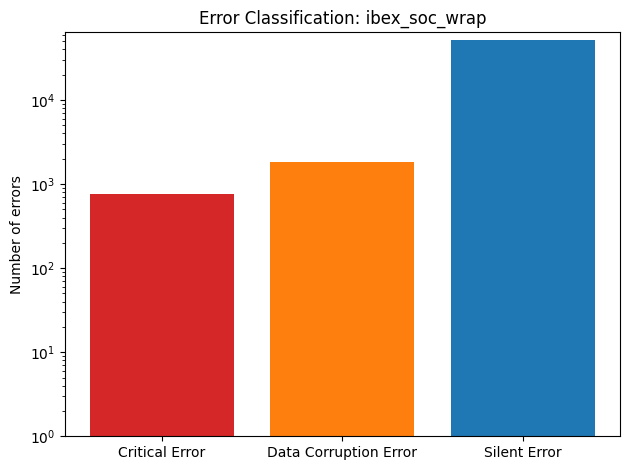

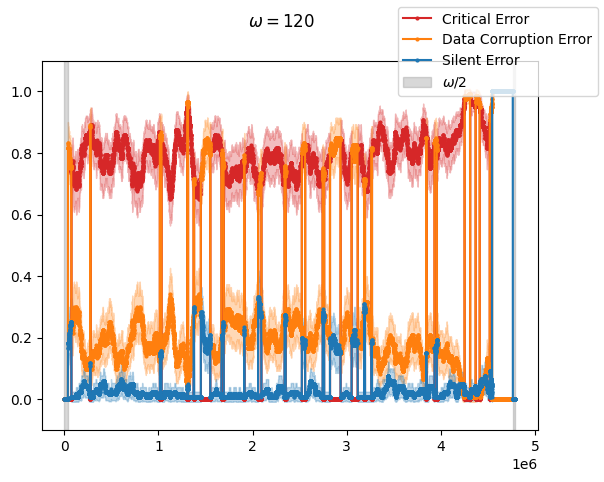

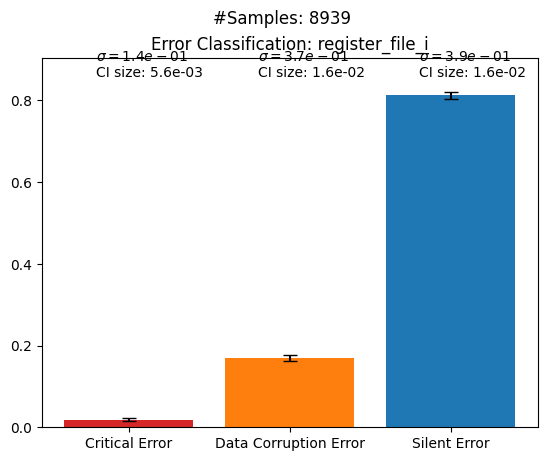

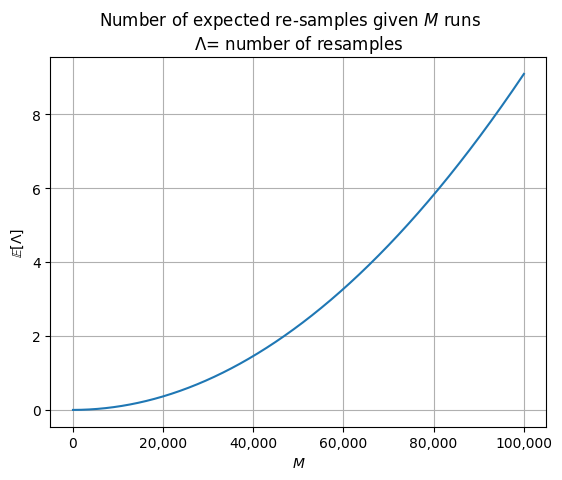

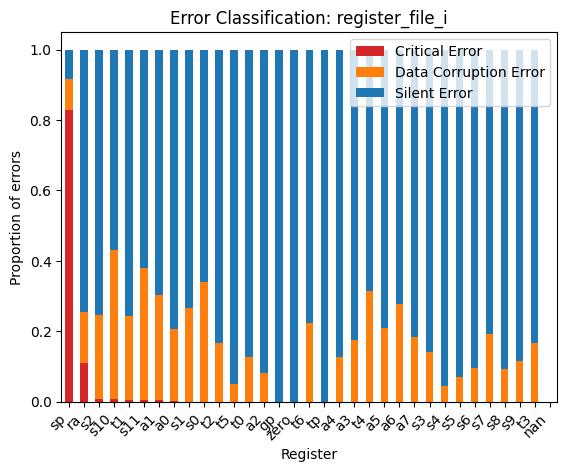

In [4]:

node_runs = list(node_data.index)

ser , plt = BaseTools.error_classification(data_interface, root, visualize=True)
plt.savefig(f'plots/error_classificiations_N{len(ser)}.png')

_ = BaseTools.windowed_error_rate(
    data_interface, node, "injection_cycle", visualize=True, window_size=120
)
plt.savefig(f'plots/windowed_error_rate_N{len(ser)}.png')

_, plt = BaseTools.error_classification_confidence(data_interface, node, visualize=True)
plt.savefig(f'plots/error_classificiation_confidence_N{len(ser)}.png')

_ = BaseTools.expected_num_multi_injection_runs(
    500_000, 2200, [100, 100_000], visualize=True
)
plt.savefig(f'plots/expected_num_multi_inj_N{len(ser)}.png')

_, plt = IbexCoremarkTools.stacked_register_error_class(
    data_interface, node, visualize=True
)

plt.savefig(f'plots/stacked_register_error_class_N{len(ser)}.png')



/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


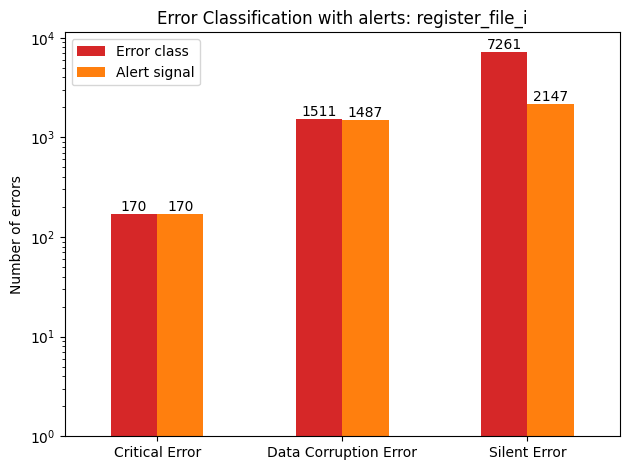

In [5]:
_ = IbexHwsecCoremarkTools.alert_classification(
    data_interface, node, visualize=True
)

### Alert signals and error class per core module


1 nodes found with name register_file_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2 nodes found with name if_stage_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2 nodes found with name id_stage_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:70: RuntimeWarning: invalid value encountered in scalar divide
  [a / e for a, e in zip(alert_series, error_heights)]
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2 nodes found with name ex_block_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:70: RuntimeWarning: invalid value encountered in scalar divide
  [a / e for a, e in zip(alert_series, error_heights)]
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2 nodes found with name load_store_unit_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:70: RuntimeWarning: invalid value encountered in scalar divide
  [a / e for a, e in zip(alert_series, error_heights)]
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2 nodes found with name cs_registers_i


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_hwsec_coremark_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


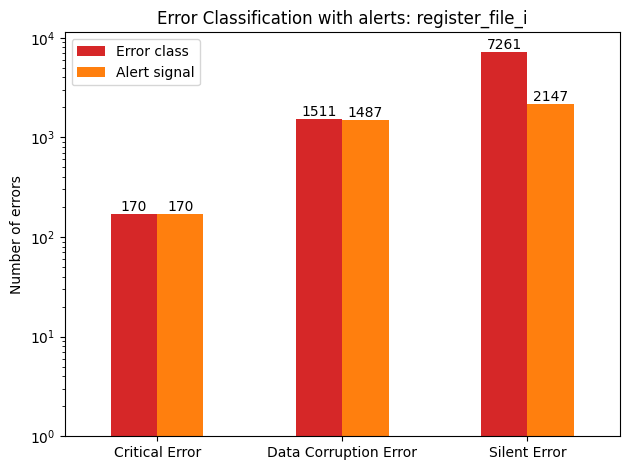

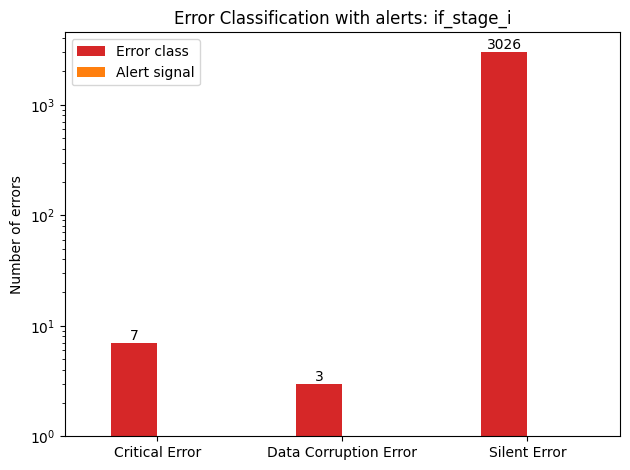

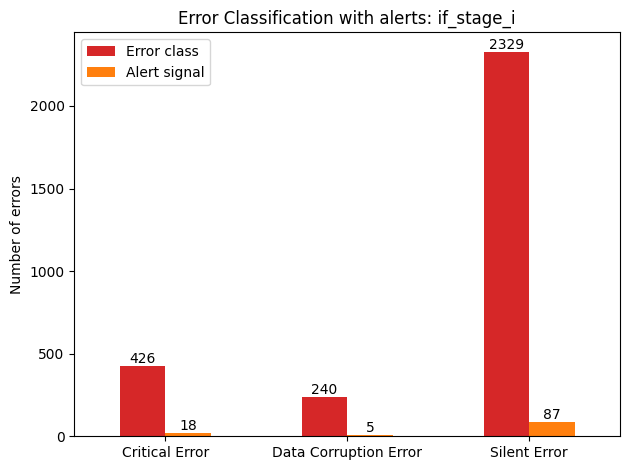

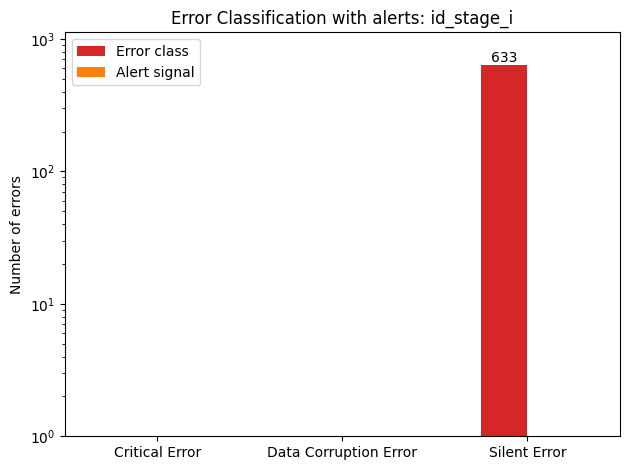

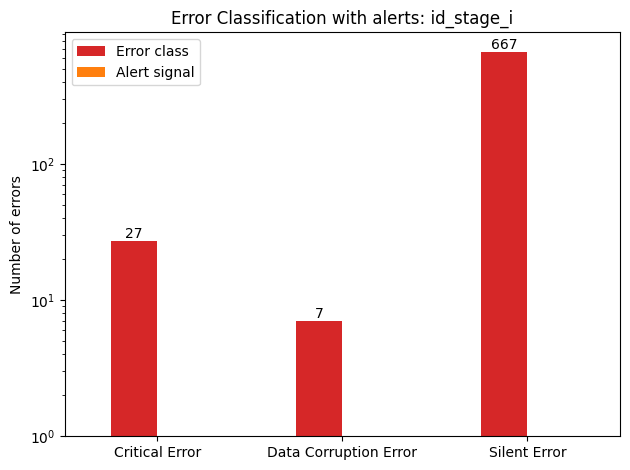

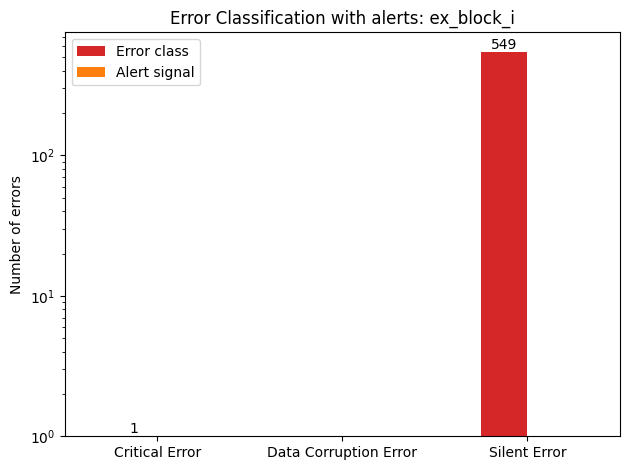

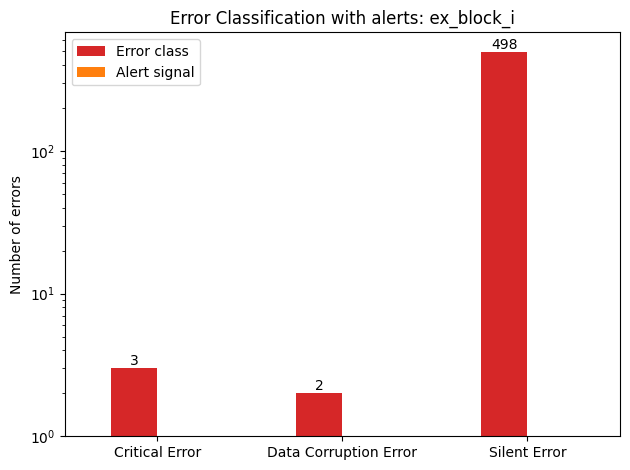

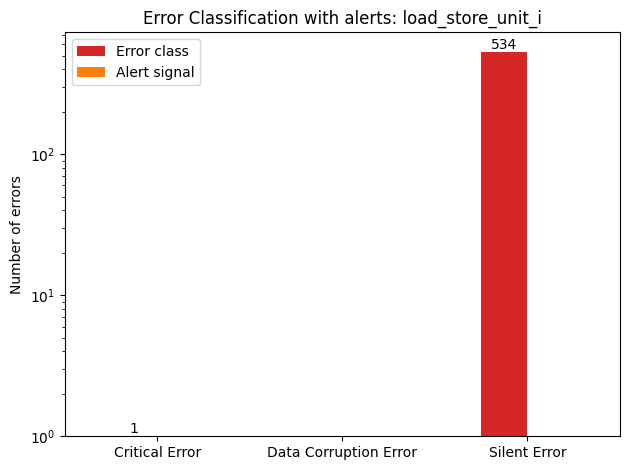

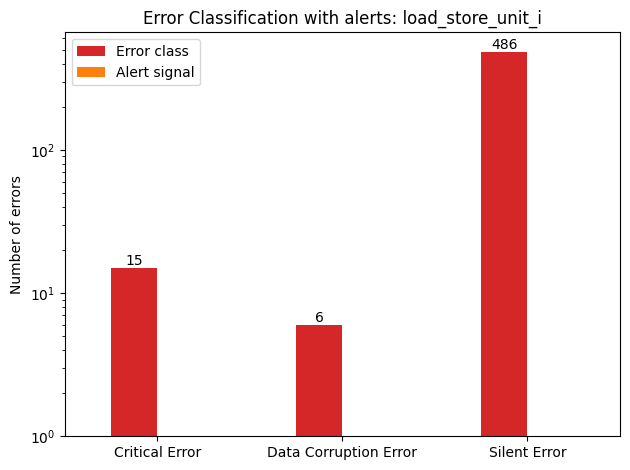

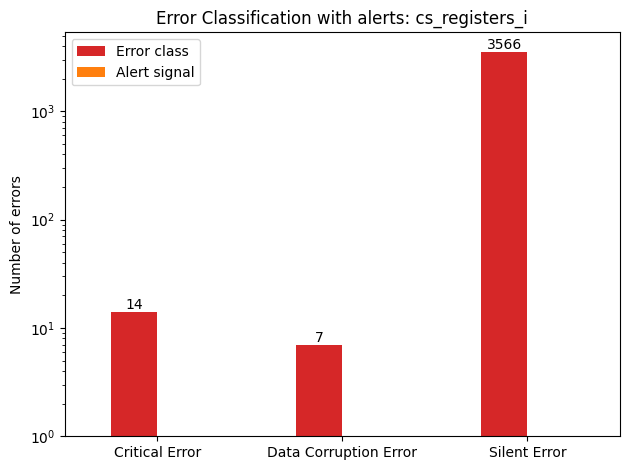

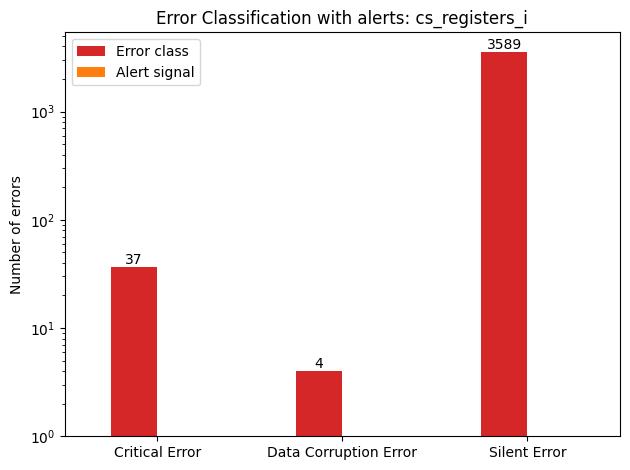

In [6]:
node_list = ["register_file_i", "if_stage_i", "id_stage_i", "ex_block_i", "load_store_unit_i", "cs_registers_i"]
import pandas as pd 
df_result = pd.DataFrame()

to_csv=False

for node_name in node_list:
    nodes_found = data_interface.get_node_by_name(node_name)
    print(f"{len(nodes_found)} nodes found with name {node_name}")
    for node_i in nodes_found:
        if "lockstep" not in node.soc_path:

            df_alert,fig = IbexHwsecCoremarkTools.alert_classification(
                data_interface, node_i, True)
                        
            df_alert = df_alert[df_alert["Critical Error"]==1]
            df_join = df_alert.merge(node_data, left_index=True, right_index=True)
            df_join = df_join[["register", "bit_number", "injection_cycle_y"]]

            # generating a df of runs that i would like to rerun,  e.g. which have crit_error=1 
            df_result = pd.concat([df_result, df_join], ignore_index=True)
            
            # save individual module injections and full data to csv
            if to_csv: df_join.to_csv(f"df_crit_{node_name}.csv")


In [7]:
regfile_name_map_ibex["rf_reg[0]"]

NameError: name 'regfile_name_map_ibex' is not defined